In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
from utils.streams import populate_streams

%matplotlib inline
plt.style.use('ggplot')


In [3]:
stream_root_folder = r"C:\Users\neurogears\Desktop\EC_datasets\BenchmarkRun2022_09_22_10_30_02"

In [21]:
#Load necessary streams for the test

streams = populate_streams(root = stream_root_folder, autoload=False)#make sure autoload is set to "False"

streams.TK.AnalogIn.Voltage.load()
streams.BioData.Set.load()
streams.BioData.Clear.load()

rising_edge_events = streams.BioData.Set.data[streams.BioData.Set.data & 3 > 0]


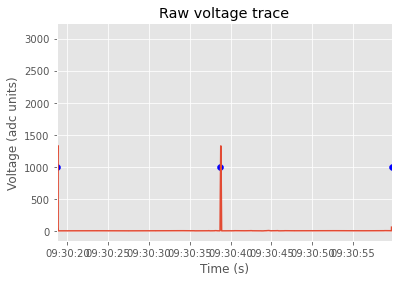

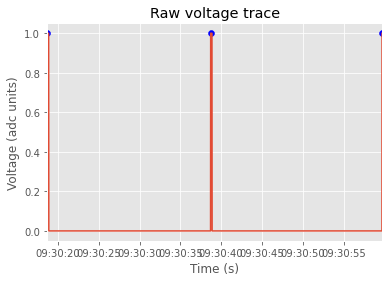

In [135]:
plt.figure()
plt.plot(streams.TK.AnalogIn.Voltage.data)
plt.scatter(x = rising_edge_events.index.values, y = np.ones(shape=rising_edge_events.index.values.shape) * 1000.0, c = 'blue')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (adc units)')
plt.title("Raw voltage trace")
plt.xlim((rising_edge_events.index[0], rising_edge_events.index[2]))
plt.show()


threshold = 20
ttl = (streams.TK.AnalogIn.Voltage.data["Value"].values > threshold).astype(int)

plt.figure()
plt.plot(streams.TK.AnalogIn.Voltage.data.index.values, ttl)
plt.scatter(x = rising_edge_events.index.values, y = np.ones(shape=rising_edge_events.index.values.shape), c = 'blue')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (adc units)')
plt.title("Raw voltage trace")
plt.xlim((rising_edge_events.index[0], rising_edge_events.index[2]))
plt.show()

In [136]:
tk_rising_edge_events = streams.TK.AnalogIn.Voltage.data.iloc[np.where(np.diff(ttl) == 1)[0] + 1,:]
tk_rising_edge_events

,Value
Seconds,
2022-09-22 09:30:18.696991920,127
2022-09-22 09:30:38.704991817,53
2022-09-22 09:30:59.706975937,59
2022-09-22 09:31:29.712992191,165
2022-09-22 09:31:39.718976021,93
...,...
2022-09-22 10:05:47.352992058,146
2022-09-22 10:06:03.346975803,69
2022-09-22 10:06:28.372992039,222


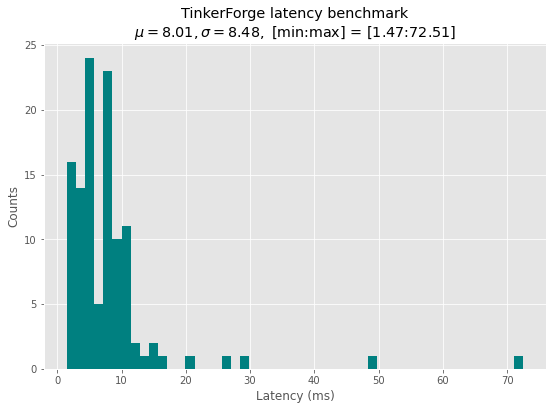

In [137]:
delta_t = rising_edge_events.index.values - tk_rising_edge_events.index.values
delta_t = -delta_t / np.timedelta64(1, 'ms')
delta_t

plt.figure(figsize= (9,6))
plt.hist(delta_t, bins = 50, color= "Teal")
plt.xlabel('Latency (ms)')
plt.ylabel('Counts')
plt.title(f'TinkerForge latency benchmark\n$\mu = {np.mean(delta_t):.2f}, \sigma = {np.std(delta_t):.2f},$ [min:max] = [{np.min(delta_t):.2f}:{np.max(delta_t):.2f}]')
plt.show()

In [138]:
#Manually construct a new stream
from utils.streams import HarpStream
streams.BioData.Photodiode = HarpStream(-1, device = 'BioData', streamlabel = 'Photodiode', root = '', autoload = False)
streams.BioData.Photodiode.data = streams.BioData.ECG.data.loc[:,"Value1"]


AttributeError: 'NoneType' object has no attribute 'loc'

In [6]:
streams.Empatica.data.E4_Hr.Value


Seconds
2022-09-22 10:16:57.820990086    78.36374
2022-09-22 10:16:58.673980236    78.36371
2022-09-22 10:16:59.348989964    78.36371
2022-09-22 10:17:00.226980209    78.36371
2022-09-22 10:17:00.901979923    76.79646
                                   ...   
2022-09-22 10:23:00.950980186    76.79644
2022-09-22 10:23:01.828000069    76.79646
2022-09-22 10:23:02.500989914    76.79644
2022-09-22 10:23:03.201980114    78.36371
2022-09-22 10:23:04.032989979    78.36371
Name: Value, Length: 111, dtype: float64

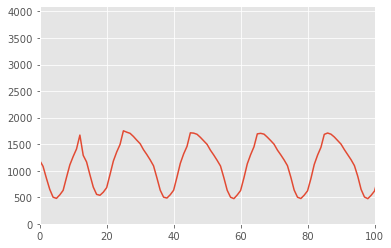

In [59]:
plt.figure()
plt.plot(streams.BioData.Photodiode.data.values)
plt.xlim(0, 100)
plt.ylim(0, 4096)
plt.show()
